In [212]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [312]:
class MorphologyMethods:
    
    def __init__(self):
        pass
    
    @staticmethod
    def erode(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
        
        '''
        Apply erosion operation to the binary image array.
        
        Parameters
        ----------
        img : np.ndarray
            Binary image array with shape (height, width).
        kernel : np.ndarray
            Kernel array with shape (height, width): height and width >= 3.
        
        Returns
        -------
        result : np.ndarray
            Eroded image array with the same shape as original image.
        '''
        
        h, w = img.shape
        kernel_h, kernel_w = kernel.shape
        kernel_shift_h = kernel.shape[0] // 2
        kernel_shift_w = kernel.shape[1] // 2
        
        result = np.zeros((h + 2 * kernel_shift_h, w + 2 * kernel_shift_w)).astype(np.uint8)
        unsquezed_img = np.zeros((h + 2 * kernel_shift_h, w + 2 * kernel_shift_w)).astype(np.uint8)
        unsquezed_img[kernel_shift_h:kernel_shift_h + h, kernel_shift_w:kernel_shift_w + w] = img
        
        for i in np.arange(img.shape[0]):
            for j in np.arange(img.shape[1]):
                
                unsquezed_i = i + kernel_shift_h
                unsquezed_j = j + kernel_shift_w
                
                img_element = unsquezed_img[unsquezed_i - kernel_shift_h:unsquezed_i + kernel_shift_h + 1,
                                            unsquezed_j - kernel_shift_w:unsquezed_j + kernel_shift_w + 1]
                
                if np.array_equal(img_element, kernel):
                    result[i + kernel_shift_h, j + kernel_shift_w] = img[i, j] | kernel[kernel_shift_h,
                                                                                        kernel_shift_w]
                    
        return result[kernel_shift_h:kernel_shift_h + h, kernel_shift_w:kernel_shift_w + w]
                
                
    
    @staticmethod
    def dilate(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
        '''
        Apply dilation operation to the binary image array.
        
        Parameters
        ----------
        img : np.ndarray
            Binary image array with shape (height, width).
        kernel : np.ndarray
            Kernel array with shape (height, width): height and width >= 3.
        Returns
        -------
        result : np.ndarray
            Dilated image array with the same shape as original image.
        '''
        
        h, w = img.shape
        kernel_h, kernel_w = kernel.shape
        kernel_shift_h = kernel.shape[0] // 2
        kernel_shift_w = kernel.shape[1] // 2
        
        result = np.zeros((h + 2 * kernel_shift_h, w + 2 * kernel_shift_w)).astype(np.uint8)
        unsquezed_img = np.zeros((h + 2 * kernel_shift_h, w + 2 * kernel_shift_w)).astype(np.uint8)
        unsquezed_img[kernel_shift_h:kernel_shift_h + h, kernel_shift_w:kernel_shift_w + w] = img
        
        for i in np.arange(img.shape[0]):
            for j in np.arange(img.shape[1]):
                
                unsquezed_i = i + kernel_shift_h
                unsquezed_j = j + kernel_shift_w
                
                if img[i, j]:
                    result[unsquezed_i - kernel_shift_h:unsquezed_i + kernel_shift_h + 1,
                           unsquezed_j - kernel_shift_w:unsquezed_j + kernel_shift_w + 1
                          ] = unsquezed_img[unsquezed_i - kernel_shift_h:unsquezed_i + kernel_shift_h + 1,
                                            unsquezed_j - kernel_shift_w:unsquezed_j + kernel_shift_w + 1] | kernel
        
        return result[kernel_shift_h:kernel_shift_h + h, kernel_shift_w:kernel_shift_w + w]

In [303]:
img = np.zeros((5, 5)).astype(np.uint8)
#img[0, 0] = 1#np.ones((1, 1), dtype=np.uint8)
#img[1:4, 1:4] = np.ones((3, 3), dtype=np.uint8)
#img[:, :] = np.ones((5, 5), dtype=np.uint8)
kernel = np.ones((3, 1)).astype(np.uint8)

In [304]:
img[4, 4] = 1

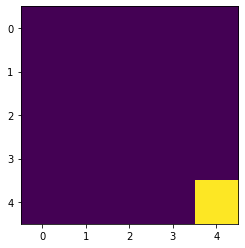

In [305]:
plt.imshow(img)

In [306]:
erode_img = cv2.dilate(img, kernel, borderValue=0)

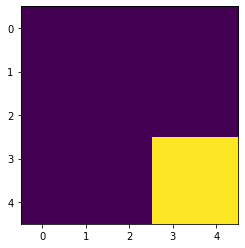

In [307]:
plt.imshow(erode_img)

In [308]:
erode_img

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]], dtype=uint8)

In [309]:
morph = MorphologyMethods()

In [310]:
result = morph.dilate(img, kernel)

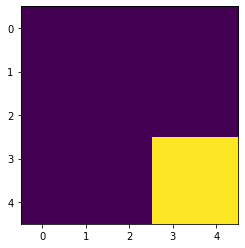

In [311]:
plt.imshow(result)

In [281]:
result

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [12]:
np.array_equal(np.array([0, 2]), np.array([1, 2]))

False

In [73]:
np.array([1., 0.]) | np.array([0., 1.])

TypeError: ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''